# Analysis on the S&P500 Stock from 2013 - 2018/2023

Arya Farivar

Financial markets are being analysed everyday and people are constantly looking for trends, patterns and correlations to make informed decision on the market. How does this indexes top stocks correlate to its overall performance?

# Import Neccecary Libraries 

In [57]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import pairplot 
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction import text
from sklearn import model_selection, metrics, linear_model, datasets, feature_selection
from scipy import stats, special
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.preprocessing import PolynomialFeatures


# Assign Respective Files To Variables

In [58]:
df = pd.read_csv('HistoricalData.csv', parse_dates=[0], index_col=0)
df3 = pd.read_csv('HistoricalData.csv', parse_dates=[0], index_col=0)
df2 = pd.read_csv('all_stocks_5yr.csv', parse_dates=[0], index_col=0)
df4 = pd.read_csv('HistoricalData.csv')
df5 = pd.read_csv('HistoricalData.csv')
df6 = pd.read_csv('all_stocks_5yr.csv')


# Data Exploration and Cleaning

In [59]:
df = df.drop('Volume', axis=1)

In [60]:
df

,Close/Last,Open,High,Low
Date,,,,
2023-04-14,4137.64,4140.11,4163.19,4113.20
2023-04-13,4146.22,4100.04,4150.26,4099.40
2023-04-12,4091.95,4121.72,4134.37,4086.94
2023-04-11,4108.94,4110.29,4124.26,4102.61
2023-04-10,4109.11,4085.20,4109.50,4072.55
...,...,...,...,...
2013-04-24,1578.79,1578.78,1583.00,1575.80
2013-04-23,1578.78,1562.50,1579.58,1562.50
2013-04-22,1562.50,1555.25,1565.55,1548.19


In [61]:
df2=df2[df2["Name"] == 'AAPL'] 

In [62]:
df2 = df2.drop('volume', axis=1)

In [63]:
df2 = df2[['open', 'high', 'low', 'close']] / 4

In [64]:
round(df2, 2)

,open,high,low,close
date,,,,
2013-02-08,16.93,17.10,16.72,16.96
2013-02-11,17.02,17.32,16.90,17.14
2013-02-12,17.13,17.23,16.71,16.71
2013-02-13,16.69,16.92,16.54,16.68
2013-02-14,16.59,16.84,16.57,16.66
...,...,...,...,...
2018-02-01,41.79,42.16,41.69,41.94
2018-02-02,41.50,41.70,40.02,40.12
2018-02-05,39.78,40.97,39.00,39.12


In [65]:
df.drop(df[df['High'] == 0].index, inplace = True)
df3.drop(df[df['High'] == 0].index, inplace = True)

In [66]:
round(df.describe(), 2)

,Close/Last,Open,High,Low
count,2516.00,2516.00,2516.00,2516.00
mean,2813.96,2813.49,2828.86,2796.90
std,871.78,871.76,878.44,864.57
min,1541.61,1541.61,1554.38,1536.03
25%,2075.11,2073.73,2082.74,2063.04
50%,2663.55,2663.63,2682.64,2648.19
75%,3444.42,3443.56,3477.48,3427.60
max,4796.56,4804.51,4818.62,4780.04


In [67]:
df4['Date'] = pd.to_datetime(df4['Date'])

In [68]:
df4 = df4.iloc[::-1].reset_index(drop=True)

In [69]:
annual_growth = df4.groupby(df4['Date'].dt.year)['Close/Last'].agg(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)

In [70]:
annual_growth

Date
2013    19.898029
2014    11.390638
2015    -0.726602
2016    11.237367
2017    18.415027
2018    -7.009396
2019    28.714796
2020    15.292908
2021    28.793050
2022   -19.953050
2023     8.197922
Name: Close/Last, dtype: float64

# Visualizing Data / Further Evaluation 

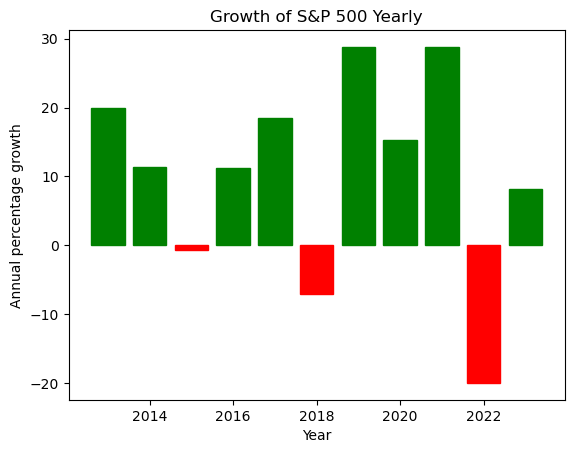

In [71]:

bars = plt.bar(annual_growth.index, annual_growth.values)
for i, bar in enumerate(bars):
    if bar.get_height() < 0:
        bar.set_color('r')
    else: bar.set_color('g')
plt.xlabel('Year')
plt.ylabel('Annual percentage growth')
plt.title('Growth of S&P 500 Yearly')
plt.show()

In [72]:
df6=df6[df6["Name"] == 'AAPL'] 
df6['date'] = pd.to_datetime(df6['date'])
annual_growth2 = df6.groupby(df6['date'].dt.year)['close'].agg(lambda x: (x.iloc[-1] - x.iloc[0]) / x.iloc[0] * 100)
annual_growth2

date
2013    18.114428
2014    39.688807
2015    -3.722674
2016     9.938301
2017    45.699526
2018    -7.384187
Name: close, dtype: float64

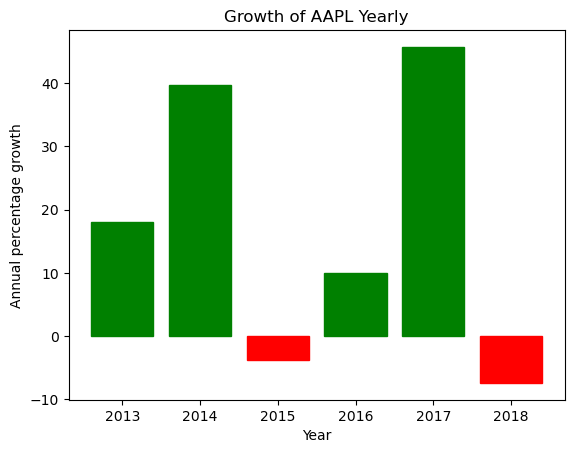

In [73]:
bars = plt.bar(annual_growth2.index, annual_growth2.values)
for i, bar in enumerate(bars):
    if bar.get_height() < 0:
        bar.set_color('r')
    else: bar.set_color('g')
plt.xlabel('Year')
plt.ylabel('Annual percentage growth')
plt.title('Growth of AAPL Yearly')
plt.show()

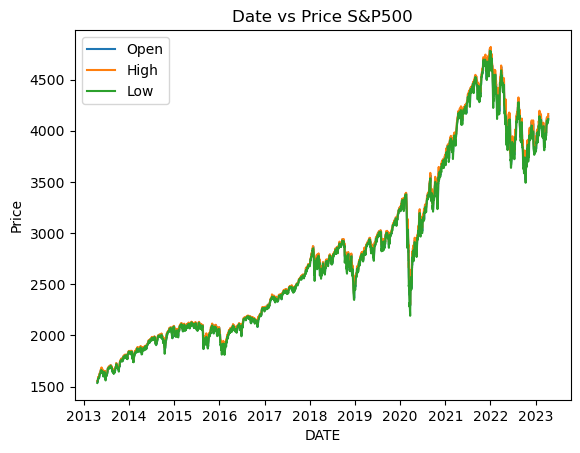

In [74]:
plt.figure()
plt.plot(df['Open'], label='Open')
plt.plot(df['High'], label='High')
plt.plot(df['Low'], label='Low')
plt.xlabel('DATE')
plt.ylabel('Price')
plt.title('Date vs Price S&P500')
plt.legend()
plt.show()

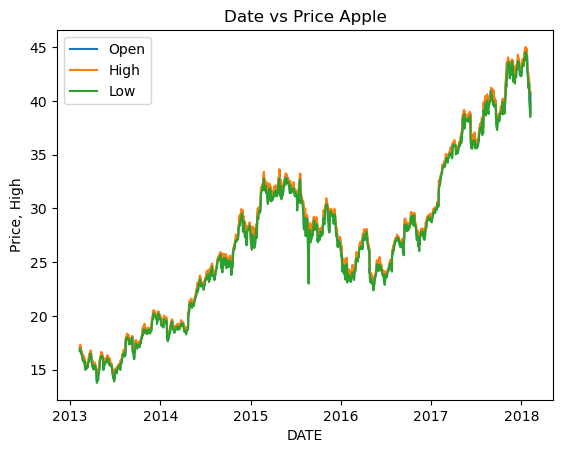

In [75]:
plt.figure()
plt.plot(df2['open'], label='Open')
plt.plot(df2['high'], label='High')
plt.plot(df2['low'], label='Low')
plt.xlabel('DATE')
plt.ylabel('Price, High')
plt.title('Date vs Price Apple')
plt.legend()
plt.show()

In [76]:
start_date = '2013-04-18'
end_date = '2018-02-07'

df = df.loc[(df.index >= start_date) & (df.index <= end_date)]

df2 = df2.loc[(df2.index >= start_date) & (df2.index <= end_date)]

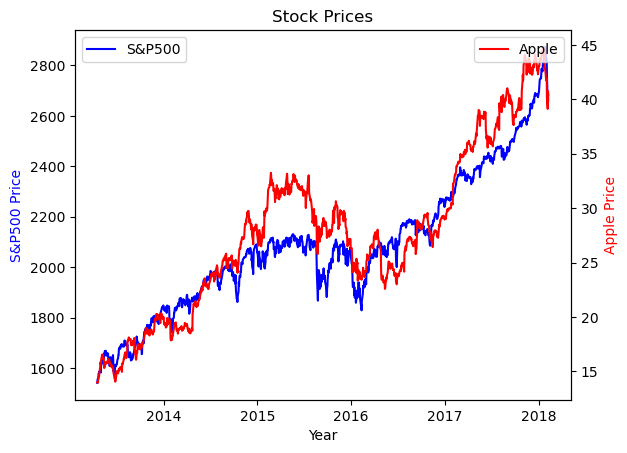

In [77]:
fig, ax1 = plt.subplots()

ax1.plot(df.index, df['Close/Last'], color='blue', label='S&P500')
ax1.set_xlabel('Year')
ax1.set_ylabel('S&P500 Price', color='blue')

ax2 = ax1.twinx()
ax2.plot(df2.index, df2['close'], color='red', label='Apple')
ax2.set_ylabel('Apple Price', color='red')

ax1.set_title('Stock Prices')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

# Correlations and Modelling

In [78]:
df_combined = pd.concat([df['Close/Last'], df2['close']], axis=1)
df_combined.columns = ['S&P500', 'Apple']

corr = df_combined['S&P500'].corr(df_combined['Apple'])

In [79]:
corr

0.9521314624373673

In [80]:
MSFT = pd.read_csv('all_stocks_5yr.csv', parse_dates=[0], index_col=0)
AMZN = pd.read_csv('all_stocks_5yr.csv', parse_dates=[0], index_col=0)
GOOGL = pd.read_csv('all_stocks_5yr.csv', parse_dates=[0], index_col=0)
NVDA = pd.read_csv('all_stocks_5yr.csv', parse_dates=[0], index_col=0)
META = pd.read_csv('all_stocks_5yr.csv', parse_dates=[0], index_col=0)
TSLA = pd.read_csv('all_stocks_5yr.csv', parse_dates=[0], index_col=0)
JPM = pd.read_csv('all_stocks_5yr.csv', parse_dates=[0], index_col=0)
UNH = pd.read_csv('all_stocks_5yr.csv', parse_dates=[0], index_col=0)


In [81]:
MSFT=MSFT[MSFT["Name"] == 'MSFT'] 
AMZN=AMZN[AMZN["Name"] == 'AMZN'] 
GOOGL=GOOGL[GOOGL["Name"] == 'GOOGL'] 
NVDA=NVDA[NVDA["Name"] == 'NVDA'] 
META=META[META["Name"] == 'META'] 
TSLA=TSLA[TSLA["Name"] == 'TSLA'] 
JPM=JPM[JPM["Name"] == 'JPM'] 
UNH=UNH[UNH["Name"] == 'UNH'] 


In [82]:
df_combined2 = pd.concat([df['Close/Last'], df2['close'], MSFT['close'], AMZN['close'], GOOGL['close'], NVDA['close'], JPM['close'], UNH['close']], axis=1)
df_combined2.columns = ['S&P500', 'Apple', 'MSFT', 'AMZN', 'GOOGL', 'NVDA', 'JPM', 'UNH']



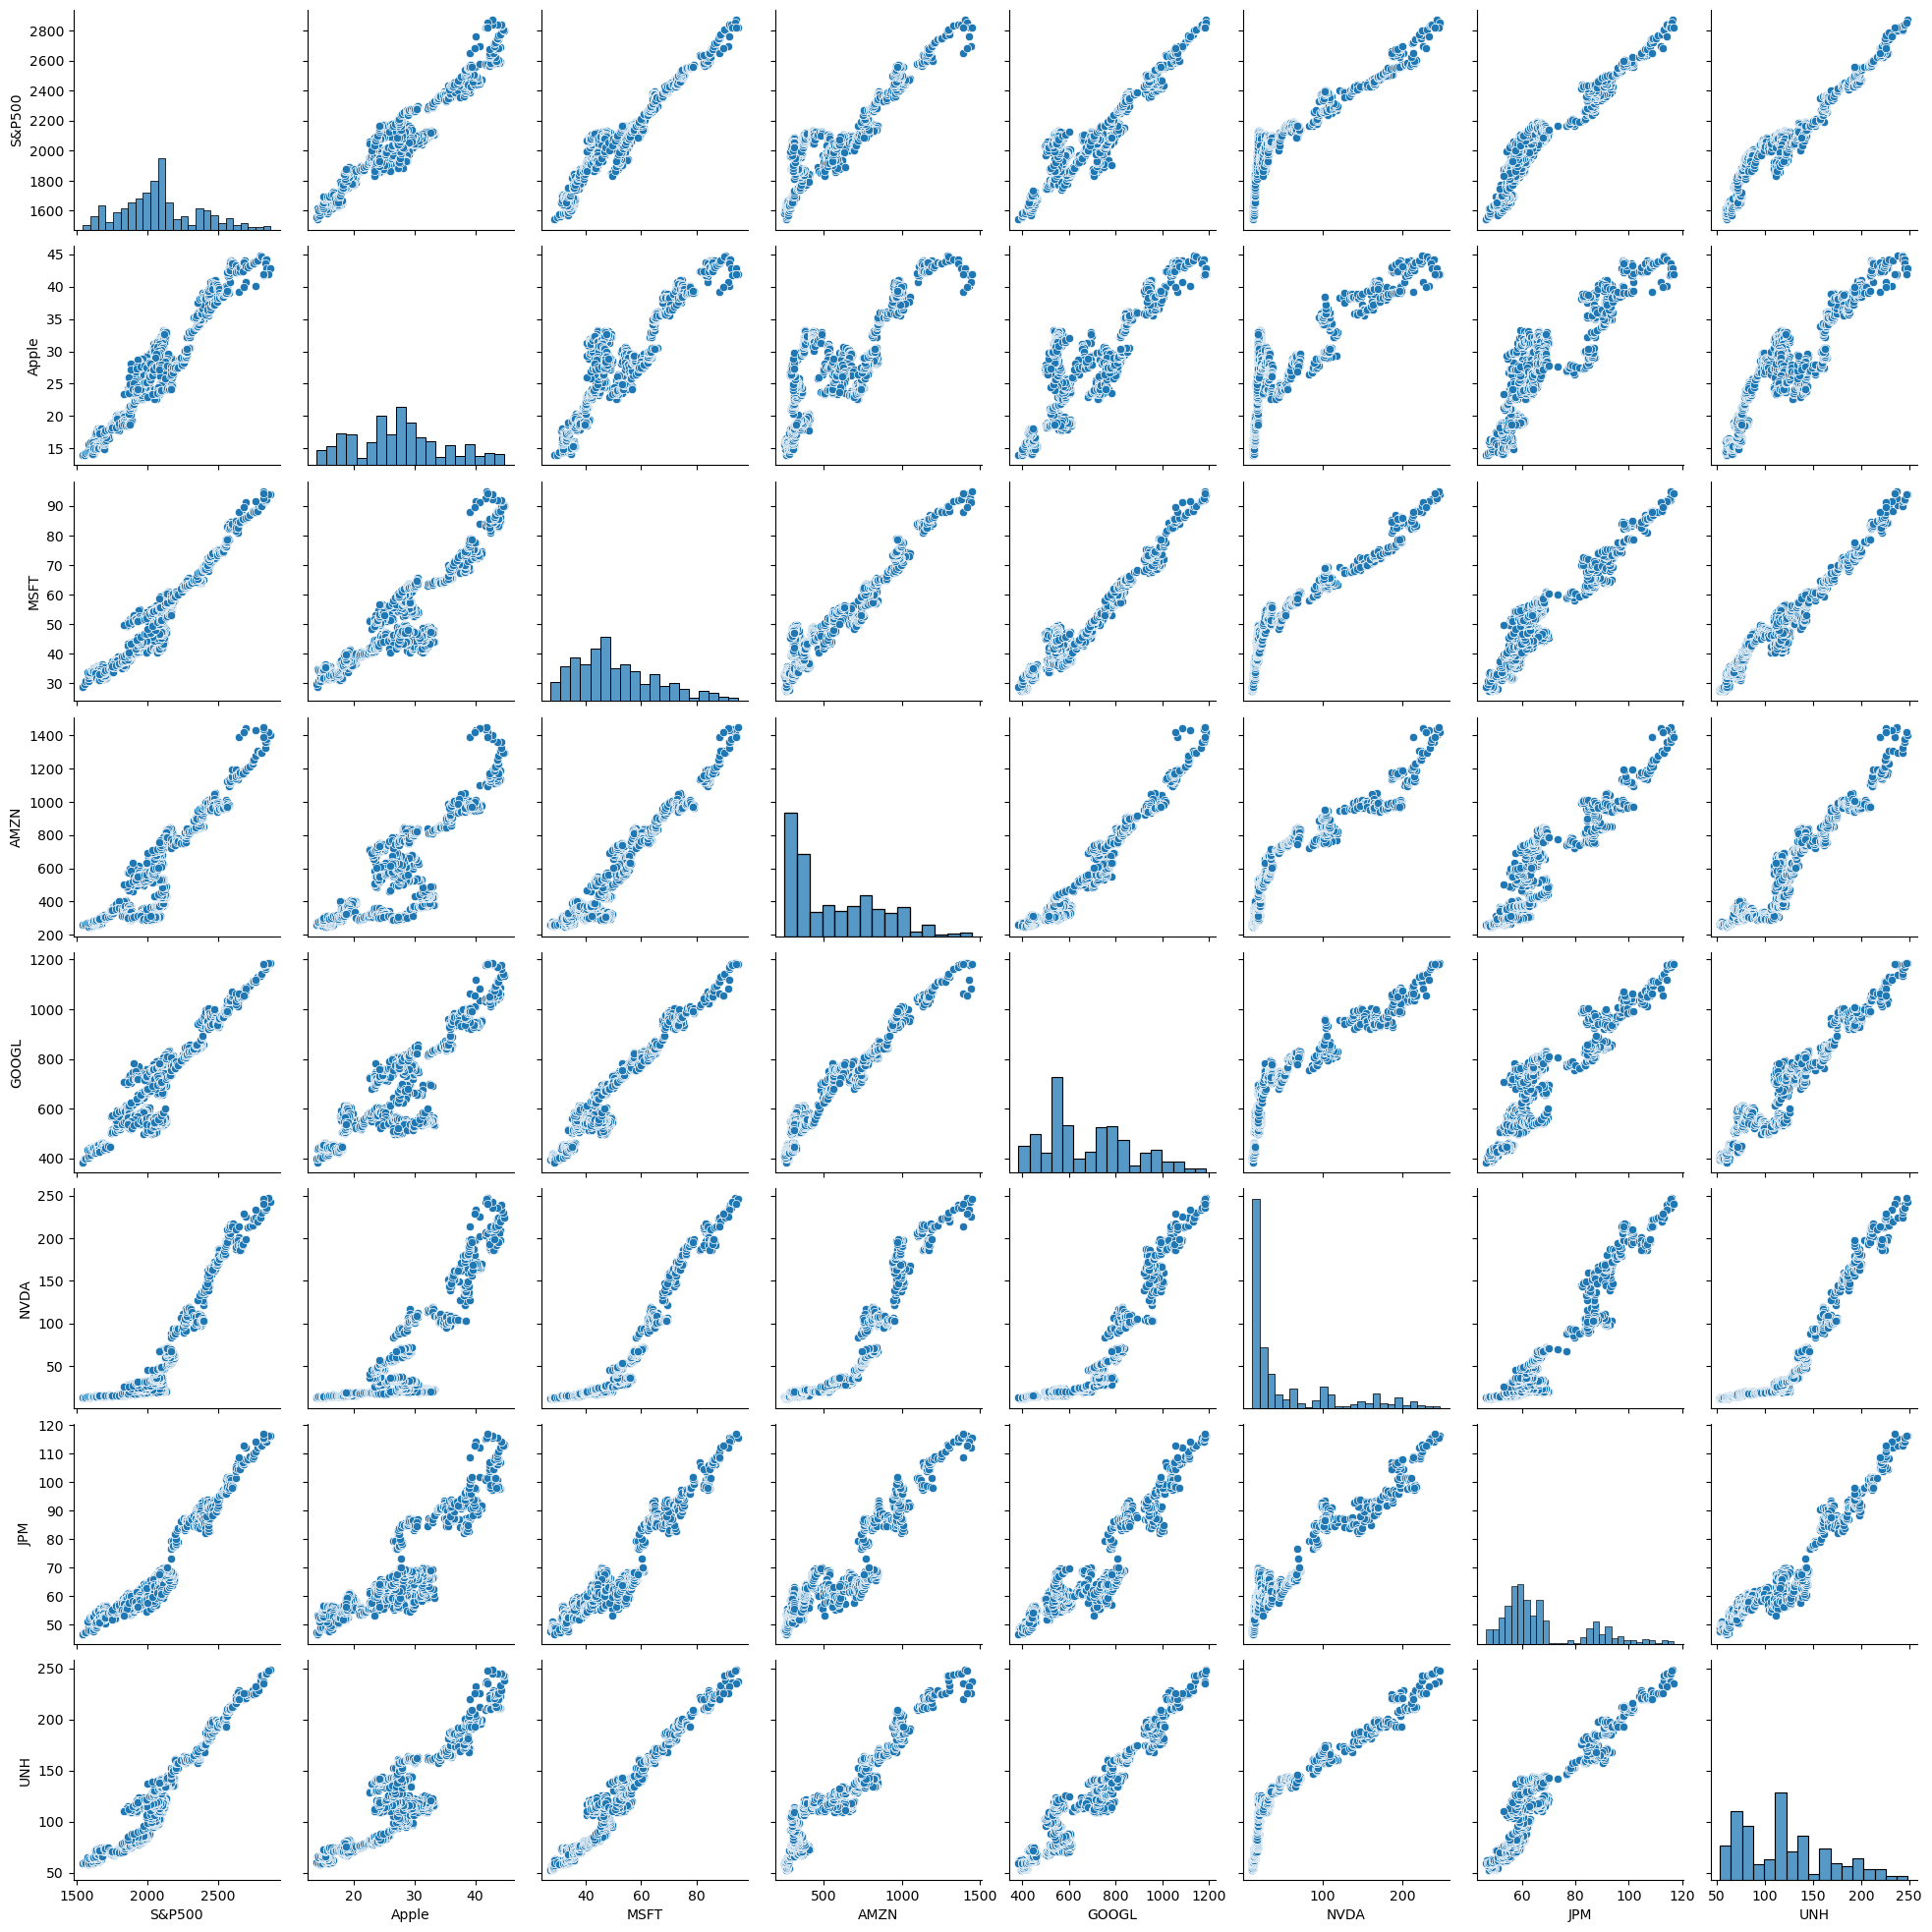

In [83]:
pairplot(df_combined2)

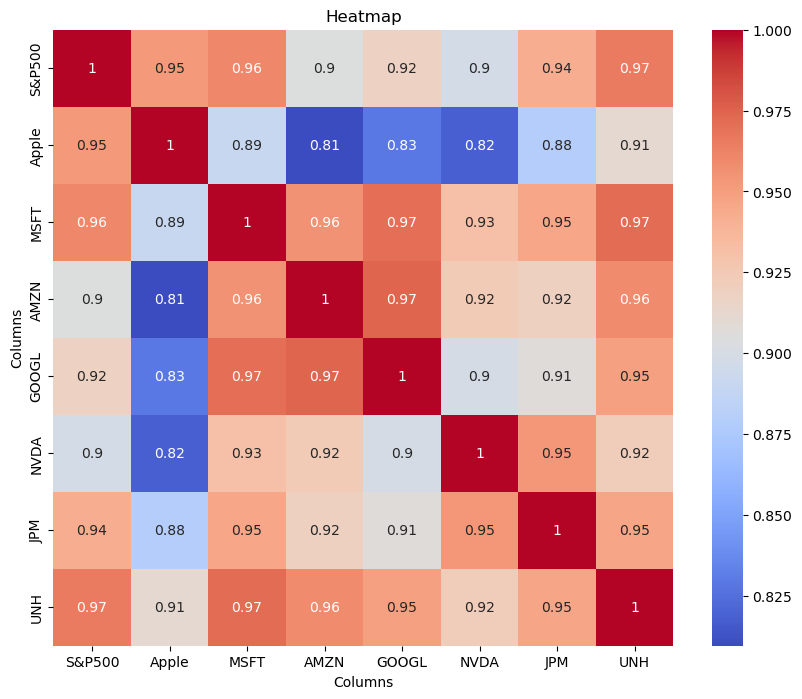

In [84]:

plt.figure(figsize=(10, 8))  
sns.heatmap(df_combined2.corr(), annot=True, cmap='coolwarm')  
plt.title('Heatmap')  
plt.xlabel('Columns') 
plt.ylabel('Columns') 
plt.show()  


In [85]:


df = pd.read_csv('HistoricalData.csv')

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')

df['NumericDate'] = (df['Date'] - pd.Timestamp("1970-01-01")) // pd.Timedelta(days=1)

df.sort_values('Date', inplace=True)


In [88]:
X = df[['NumericDate']]
y = df['Close/Last']

poly = PolynomialFeatures(degree=1)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

future_dates = pd.date_range(start='04/14/2013', periods=365 * 14, freq='D')
future_numeric_dates = (future_dates - pd.Timestamp("1970-01-01")) // pd.Timedelta(days=1)
future_X_poly = poly.transform(np.array(future_numeric_dates).reshape(-1, 1))

future_close_prices = model.predict(future_X_poly)


D:\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


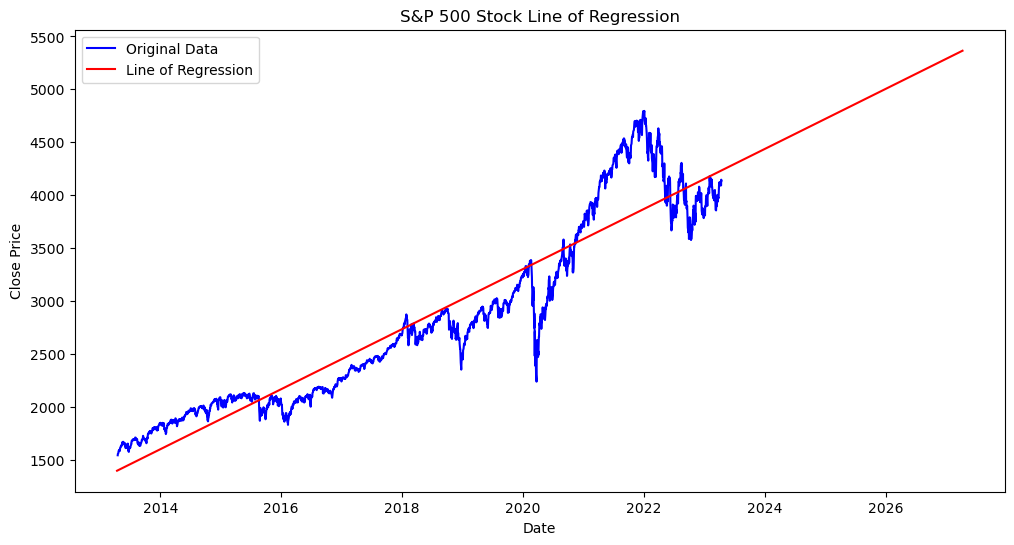

In [89]:

plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close/Last'], color='blue', label='Original Data')
plt.plot(future_dates, future_close_prices, color='red', label='Line of Regression')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('S&P 500 Stock Line of Regression')
plt.legend()
plt.show()